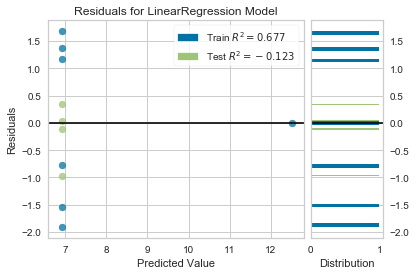

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
from sklearn.datasets import load_wine
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

x = [8,8,8,8,8,8,8,19,8,8,8]
y = [6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89]
x = pd.DataFrame(x).to_numpy()
y = pd.DataFrame(y).to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
regr = LinearRegression()
visualizer = ResidualsPlot(regr)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()


In [28]:
from sklearn.model_selection import cross_val_score
import math

data = load_wine()
standard = pre.StandardScaler()
data.data = standard.fit_transform(data.data)
df = pd.DataFrame(data.data, columns=data.feature_names)
x = pd.DataFrame(df[['flavanoids','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','nonflavanoid_phenols','proanthocyanins','hue','proline','od280/od315_of_diluted_wines','color_intensity']]).to_numpy()
y = pd.DataFrame(df['total_phenols']).to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
regr = LinearRegression()
regr.fit(x_train,y_train)

print ("Single Training Test Split: " + "\n" )
print (regr.score(x_test,y_test))
print("\n")
print("2-fold" + "\n")
print(cross_val_score(regr,x,y,cv = 2))
print((cross_val_score(regr,x,y,cv = 2)).mean())
print("\n")
print("3-fold" + "\n")
print(cross_val_score(regr,x,y,cv = 3))
print((cross_val_score(regr,x,y,cv = 3)).mean())
print("\n")
print("5-fold" + "\n")
print(cross_val_score(regr,x,y,cv = 5))
print((cross_val_score(regr,x,y,cv = 5)).mean())
print("\n")
print("10-fold" + "\n")
print(cross_val_score(regr,x,y,cv = 10))
print((cross_val_score(regr,x,y,cv = 10)).mean())

Single Training Test Split: 

0.739112484466071


2-fold

[ 0.57422268 -0.02502349]
0.2745995933294306


3-fold

[-0.39302194  0.33576336 -1.68109816]
-0.5794522475557747


5-fold

[ 0.51223497  0.49469916  0.31715765  0.58266596 -0.10910155]
0.35953123792481734


10-fold

[ 0.59421468  0.6540207   0.48658507  0.47686093  0.35141176  0.37755854
  0.29991271  0.25607146 -0.08959804  0.12418994]
0.35312277512815843


In [3]:
# Two observation not in my expectations:
# The Score is not positively correlated with the number of folds.
# Compared to the single training test split, cross validations have lower R2 scores.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(x)

array([[ 1.        ,  1.03481896,  1.51861254, ...,  3.41480672,
         0.46515249,  0.06336137],
       [ 1.        ,  0.73362894,  0.24628963, ...,  1.23976935,
        -0.32659843,  0.0860374 ],
       [ 1.        ,  1.21553297,  0.19687903, ...,  0.62187017,
         0.21214552,  0.07237157],
       ...,
       [ 1.        , -1.34458217,  0.33275817, ...,  2.20654827,
        -3.30398127,  4.94722566],
       [ 1.        , -1.35462184,  0.20923168, ...,  1.96195743,
        -2.57017463,  3.36694237],
       [ 1.        , -1.2743045 ,  1.39508604, ...,  2.04189172,
        -2.56019711,  3.21006702]])

In [5]:
poly = PolynomialFeatures(3)
poly.fit_transform(x)

array([[ 1.        ,  1.03481896,  1.51861254, ...,  0.85956439,
         0.11708672,  0.01594913],
       [ 1.        ,  0.73362894,  0.24628963, ..., -0.36365079,
         0.09579829, -0.02523661],
       [ 1.        ,  1.21553297,  0.19687903, ...,  0.1672953 ,
         0.05707131,  0.01946937],
       ...,
       [ 1.        , -1.34458217,  0.33275817, ...,  4.90788403,
        -7.34883398, 11.00379727],
       [ 1.        , -1.35462184,  0.20923168, ...,  3.60004079,
        -4.7160725 ,  6.17807995],
       [ 1.        , -1.2743045 ,  1.39508604, ...,  3.65838794,
        -4.58701809,  5.7513679 ]])

In [26]:
poly = PolynomialFeatures(5)
poly.fit_transform(x)

array([[ 1.00000000e+00,  1.03481896e+00,  1.51861254e+00, ...,
         5.44631796e-02,  7.41877528e-03,  1.01055846e-03],
       [ 1.00000000e+00,  7.33628941e-01,  2.46289627e-01, ...,
        -3.12875694e-02,  8.24223556e-03, -2.17129193e-03],
       [ 1.00000000e+00,  1.21553297e+00,  1.96879028e-01, ...,
         1.21074235e-02,  4.13034065e-03,  1.40902925e-03],
       ...,
       [ 1.00000000e+00, -1.34458217e+00,  3.32758175e-01, ...,
         2.42804098e+01, -3.63563401e+01,  5.44382682e+01],
       [ 1.00000000e+00, -1.35462184e+00,  2.09231678e-01, ...,
         1.21211299e+01, -1.58787443e+01,  2.08012392e+01],
       [ 1.00000000e+00, -1.27430450e+00,  1.39508604e+00, ...,
         1.17436705e+01, -1.47246355e+01,  1.84622764e+01]])

In [7]:
# As the number of features increases, the number of combinations(interactions) of the two features increases.  

In [27]:
from sklearn.linear_model import Ridge

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

ridge1 = Ridge(alpha = 0.0)
ridge1.fit(x_train,y_train)
print("R2 score: " +str(ridge1.score(x_test,y_test)))
print("Coefficient: " + str(ridge1.coef_))

ridge2 = Ridge(alpha = 1.0)
ridge2.fit(x_train,y_train)
print("R2 score: " +str(ridge2.score(x_test,y_test)))
print("Coefficient: " + str(ridge2.coef_))

ridge3 = Ridge(alpha = 5.0)
ridge3.fit(x_train,y_train)
print("R2 score: " +str(ridge3.score(x_test,y_test)))
print("Coefficient: " + str(ridge3.coef_))

R2 score: 0.7391124844660718
Coefficient: [[ 0.7266341  -0.00356771  0.05752865 -0.03143549  0.01390749  0.01295024
  -0.02307197  0.03806437  0.02353585  0.08053915  0.15693274  0.09620514]]
R2 score: 0.7413545575927095
Coefficient: [[ 0.70274659 -0.00078234  0.05339981 -0.02388143  0.00984453  0.01068372
  -0.02617519  0.04693349  0.02474024  0.07957545  0.16471008  0.09554188]]
R2 score: 0.7459276593915372
Coefficient: [[ 0.62775236  0.00872543  0.04045938 -0.00116714 -0.00210504  0.00432192
  -0.03594594  0.07421206  0.02863494  0.07778534  0.18611523  0.0907315 ]]


In [9]:
# The regularization does help, as the value of alpha increases, the value of R2 increases.
# The model coefficients/weights decreases when we regularize the data more (value of alpha increases)